In [1]:
import pandas as pd
import numpy as np
pd.set_option ("display.max_columns", 32)
pd.set_option ("display.max_rows", None)

In [2]:
#C:\Users\HP\Desktop\Rakamin\Mini Project\Investigate Hotel Business using Data Visualization
df = pd.read_csv("hotel_bookings_data.csv")

# Data Preparation and Cleaning

In [3]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
numeric = df.loc[:, (df.dtypes == np.int64) | (df.dtypes == np.float64)].columns.tolist()
numeric

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_weekdays_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [6]:
categorical = df.loc[:, (df.dtypes != np.int64) & (df.dtypes != np.float64)].columns.tolist()
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'city',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [7]:
df[numeric].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
df[categorical].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


# Cek Data Kosong / Mengatasi data null

In [9]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,company,112593,94.307
1,agent,16340,13.686
2,city,488,0.409
3,children,4,0.003


In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

#### <font color='blue'> Menghapus feature company karna memiliki missing value percentase nya mencapai 95% </font>

In [11]:
df.drop(['company'],inplace=True, axis=1)

#### <font color='blue'> Mengisi Feature Children yang kosong dengan nilai 0 </font>

In [12]:
df['children'].fillna(0,inplace=True)

#### <font color='blue'> Mengisi Feature City yang kosong dengan nilai Kota Denpasar </font>

In [13]:
## ????????????????
df['city'].fillna('Kota Hantu',inplace=True) 

#### <font color='blue'> Mengubah tipe data feature children menjadi integer32 </font>

In [14]:
df['children'] = df['children'].astype(int)

# Mengganti value yang tidak sesuai

In [15]:
df['children'].value_counts()

0     110800
1       4861
2       3652
3         76
10         1
Name: children, dtype: int64

#### <font color='blue'> Mengganti Undefined Value Menjadi No Meal / Karna memiliki persamaan makna yang sama </font>

In [16]:
meal_tanya = df[df.meal == 'Undefined']
meal_tanya.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
3106,Resort Hotel,0,105,2017,January,47,18,2,4,2,0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Family,69.0,0,0,Check-Out
3107,Resort Hotel,0,105,2017,January,47,18,2,4,2,0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Family,69.0,0,0,Check-Out
3108,Resort Hotel,0,105,2017,January,47,18,2,4,2,0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Family,69.0,0,0,Check-Out
3110,Resort Hotel,0,62,2017,January,47,18,2,4,2,0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,0,Family,69.0,0,0,Check-Out
3111,Resort Hotel,0,105,2017,January,47,18,2,4,2,0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Family,69.0,0,0,Check-Out
3112,Resort Hotel,0,105,2017,January,47,18,2,4,2,0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Family,69.0,0,0,Check-Out
3113,Resort Hotel,0,105,2017,January,47,18,2,4,2,0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Family,69.0,0,0,Check-Out
3114,Resort Hotel,0,62,2017,January,47,18,2,4,1,0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,0,Family,49.0,0,0,Check-Out
3115,Resort Hotel,0,105,2017,January,47,18,2,4,2,0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Family,69.0,0,0,Check-Out
3116,Resort Hotel,0,105,2017,January,47,18,2,4,2,0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,65,Family,69.0,0,0,Check-Out


In [17]:
nomeal_tanya = df[df.meal == 'No Meal']
nomeal_tanya.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
1655,Resort Hotel,0,30,2017,November,37,7,13,33,2,0,0,No Meal,Kota Batu,Online TA,TA/TO,0,0,0,17,No Deposit,240.0,0,Personal,0.0,0,1,Check-Out
1971,Resort Hotel,0,16,2017,November,39,25,0,1,1,0,0,No Meal,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,0,Family,80.0,0,1,Check-Out
1973,Resort Hotel,0,16,2017,November,39,25,0,1,1,0,0,No Meal,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,0,Family,80.0,0,1,Check-Out
2224,Resort Hotel,0,1,2017,December,41,6,0,3,0,0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,1,No Deposit,NaN,0,Family,0.0,0,0,Check-Out
2407,Resort Hotel,0,5,2017,December,42,11,4,5,1,0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,NaN,0,Family,0.0,0,0,Check-Out
2409,Resort Hotel,0,0,2017,December,42,12,0,0,0,0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,NaN,0,Personal,0.0,0,0,Check-Out
3181,Resort Hotel,0,36,2017,January,47,20,1,2,0,0,0,No Meal,Kota Batu,Groups,TA/TO,0,0,0,0,No Deposit,38.0,0,Family,0.0,0,0,Check-Out
3684,Resort Hotel,0,165,2017,February,53,30,1,4,0,0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,122,Family,0.0,0,0,Check-Out
3708,Resort Hotel,0,165,2017,February,53,30,2,4,0,0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,122,Family,0.0,0,0,Check-Out
4127,Resort Hotel,1,0,2018,April,8,15,0,0,0,0,0,No Meal,Kota Hantu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,NaN,0,Personal,0.0,0,0,Canceled


In [18]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [19]:
df['meal'] = np.where(df['meal'] == 'Undefined', 'No Meal', df['meal'])
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

In [20]:
df.groupby(['arrival_date_month', 'arrival_date_year']).count()

hotel  is_canceled  lead_time  \
arrival_date_month arrival_date_year                                  
April              2018                3891         3891       3891   
                   2019                4177         4177       4177   
August             2018                5292         5292       5292   
                   2019                5647         5647       5647   
December           2017                4957         4957       4957   
                   2018                6203         6203       6203   
February           2017                2920         2920       2920   
                   2018                3860         3860       3860   
January            2017                2340         2340       2340   
                   2018                4454         4454       4454   
July               2018                5478         5478       5478   
                   2019                6313         6313       6313   
June               2018                5428         5428       5428   
                   2019                5661         5661       5661   
March              2018                2248         2248       2248   
                   2019                3681         3681       3681   
May                2018                4824         4824       4824   
                   2019                4970         4970       4970   
November           2017                5114         5114       5114   
                   2018                5394         5394       5394   
October            2017                3889         3889       3889   
                   2018                5063         5063       5063   
                   2019                4925         4925       4925   
September          2017                2776         2776       2776   
                   2018                4572         4572       4572   
                   2019                5313         5313       5313   

                                      arrival_date_week_number  \
arrival_date_month arrival_date_year                             
April              2018                                   3891   
                   2019                                   4177   
August             2018                                   5292   
                   2019                                   5647   
December           2017                                   4957   
                   2018                                   6203   
February           2017                                   2920   
                   2018                                   3860   
January            2017                                   2340   
                   2018                                   4454   
July               2018                                   5478   
                   2019                                   6313   
June               2018                                   5428   
                   2019                                   5661   
March              2018                                   2248   
                   2019                                   3681   
May                2018                                   4824   
                   2019                                   4970   
November           2017                                   5114   
                   2018                                   5394   
October            2017                                   3889   
                   2018                                   5063   
                   2019                                   4925   
September          2017                                   2776   
                   2018                                   4572   
                   2019                                   5313   

                                      arrival_date_day_of_month  \
arrival_date_month arrival_date_year                              
April              2018                                    3891   

In [21]:
df.groupby(['hotel','arrival_date_month']).agg({'is_canceled':'count'})

is_canceled
hotel        arrival_date_month             
City Hotel   April                      4965
             August                     7894
             December                   7605
             February                   4132
             January                    4357
             July                       8232
             June                       7480
             March                      3736
             May                        6458
             November                   7400
             October                    8983
             September                  8088
Resort Hotel April                      3103
             August                     3045
             December                   3555
             February                   2648
             January                    2437
             July                       3559
             June                       3609
             March                      2193
             May                        3336
             November                   3108
             October                    4894
             September                  4573

# Membuang data yang tidak diperlukan

In [22]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status'],
      dtype='object')

In [23]:
selected_columns= ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children','babies', 'meal',
       'city', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'deposit_type', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']

#### <font color='blue'> Membuat copy dataframe hingga ga mengganggu dataset asli : </font> 
    1. Menghilangkan Informasi Agent karena Range Max dan Min Yang sangat jauh bisa dianggap nilainya tidak normal.
    2. Menghilang feature babies karna di anggap tidak masuk dalam perhitung, 
    3. Informasi perubahan Cancelation pada suatu baris,
    4. Day Waiting List tidak dianggap penting 
    5. reservation_status tidak memberikan informasi tambahan

In [24]:
bookings_df = df[selected_columns].copy()

####  <font color='blue'> Feature Extraction : Menjumlahkan adults + children menjadi fitur baru total pengunjung dan lalu menghapus nya ( adults, children ) </font>

In [25]:
bookings_df['Total_Guests'] = bookings_df['adults'] + bookings_df['children'] + bookings_df['babies']

In [26]:
#bookings_df = bookings_df.drop(['adults', 'children'], axis=1)

#### <font color='blue'> melakukan filter data yang hanya memiliki jumlah total_guest lebih besar atau sama dengan 1, Karena masih terdapat data tamu yang bernilai 0 </font>

In [27]:
tamu_kosong = bookings_df[bookings_df.Total_Guests == 0]
tamu_kosong.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
2224,Resort Hotel,0,1,2017,December,41,6,0,3,0,0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,No Deposit,Family,0.0,0,0,0
2409,Resort Hotel,0,0,2017,December,42,12,0,0,0,0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,No Deposit,Personal,0.0,0,0,0
3181,Resort Hotel,0,36,2017,January,47,20,1,2,0,0,0,No Meal,Kota Batu,Groups,TA/TO,0,0,0,No Deposit,Family,0.0,0,0,0
3684,Resort Hotel,0,165,2017,February,53,30,1,4,0,0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,No Deposit,Family,0.0,0,0,0
3708,Resort Hotel,0,165,2017,February,53,30,2,4,0,0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,No Deposit,Family,0.0,0,0,0


In [28]:
bookings_df= bookings_df[bookings_df.Total_Guests >= 1]

In [29]:
bookings_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,No Deposit,Personal,0.0,0,0,2
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,No Deposit,Personal,0.0,0,0,2
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,No Deposit,Personal,75.0,0,0,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,No Deposit,Personal,75.0,0,0,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,No Deposit,Personal,98.0,0,1,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,No Deposit,Personal,98.0,0,1,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,No Deposit,Personal,107.0,0,0,2
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,No Deposit,Personal,103.0,0,1,2
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,No Deposit,Personal,82.0,0,1,2
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,0,0,Dinner,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,No Deposit,Personal,105.5,0,0,2


In [30]:
# melakukan filter data yang tidak ada pembatalan sewa ( is_canceled = 0 )
df_no_cancel= bookings_df[bookings_df.is_canceled == 0]
df_no_cancel.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
89499,City Hotel,0,7,2018,July,21,21,0,1,2,0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,No Deposit,Personal,107.00,0,0,2
3652,Resort Hotel,0,65,2017,February,53,30,0,4,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,No Deposit,Personal,102.60,0,2,2
33035,Resort Hotel,0,7,2019,April,6,10,0,2,2,0,0,Breakfast,Kota Batu,Direct,Direct,0,0,0,No Deposit,Personal,66.00,0,2,2
37418,Resort Hotel,0,125,2019,August,23,10,2,5,2,0,0,Dinner,Kota Yogyakarta,Online TA,TA/TO,0,0,0,No Deposit,Personal,172.00,1,1,2
97842,City Hotel,0,71,2018,November,38,14,2,5,3,0,0,Breakfast,Kabupaten Bandung,Offline TA/TO,TA/TO,0,0,0,No Deposit,Personal,137.53,0,0,3


# Tugas 3

In [31]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### <font color='blue'> Membuat Fungsi untuk melihat nilai dan Persentase nilai </font>

In [32]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

#### <font color='blue'> Membuat Fungsi yang dapat menampilkan plot digram yang dapat digunakan berulang kali, fungsi ini menggunakan 2 array </font>

In [33]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

#### <font color='blue'> Membuat Kolom Baru total durasi menginap </font>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


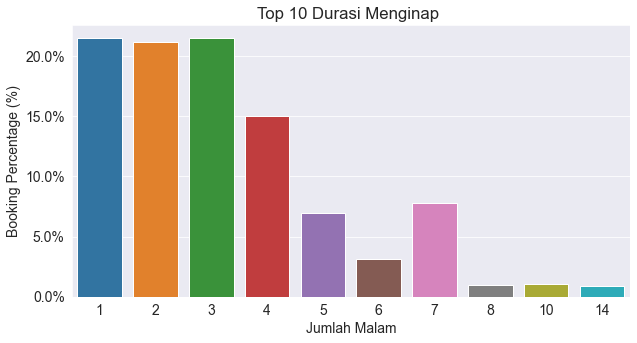

In [34]:
total_nights = df_no_cancel['stays_in_weekend_nights']+ df_no_cancel['stays_in_weekdays_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Jumlah Malam', y_label='Booking Percentage (%)', title='Top 10 Durasi Menginap ', figsize=(10,5))

#### <font color='brown'> Durasi Waktu Pengunjung Menginap Di dataset ini Sekitar 60% Pelanggan menginap hanya selama 1-3 Hari, Sedangkan 40% lainnya lebih dari 3 Hari </font>

#### <font color='blue'> Trend Durasi Lama Menginap Untuk Tiap Tipe Hotel </font>

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


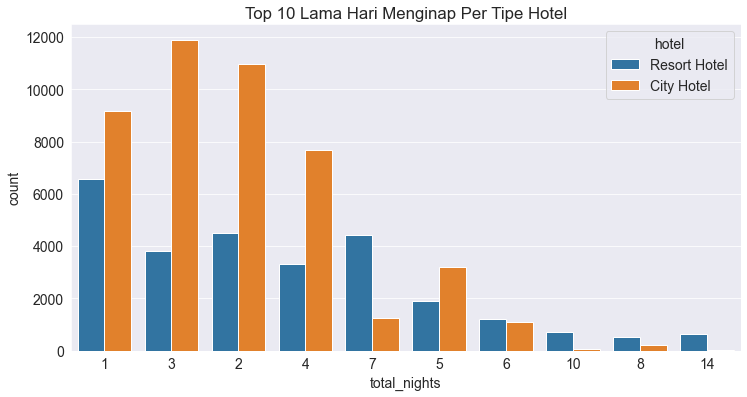

In [42]:
df_no_cancel.loc[:,'total_nights'] = df_no_cancel['stays_in_weekend_nights']+ df_no_cancel['stays_in_weekdays_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Top 10 Lama Hari Menginap Per Tipe Hotel')
sns.countplot(x='total_nights', hue='hotel', data=df_no_cancel,
              order = df_no_cancel['total_nights'].value_counts().iloc[:10].index, ax=ax);

#### <font color='brown'> Untuk Tipe Resort Hotel, Trend Menunjukan Banyak digunakan untuk menginap lebih dari 7 hari lamanya. Sedangkan City Hotel Hanya digunakan untuk menginap paling lama dan sering 5 Hari. Sangat sedikit pengunjung yang menggunakan city hotel sampai dengan waktu lebih dari 7 hari dibanding dengan resort hotel. </font>

#### <font color='blue'> Mengelompokan Pengunjung Hotel Menjadi 3 Kategori :  </font> 
#### <font color='blue'> 1. Dewasa </font> 
#### <font color='blue'> 2. Pasangan, Pengunjung lebih dari 1 dan kolom chidren serta babies nilainya 0 </font> 
#### <font color='blue'> 3. Keluarga, dimana kolom chidren dan babies nilainya 0 </font> 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


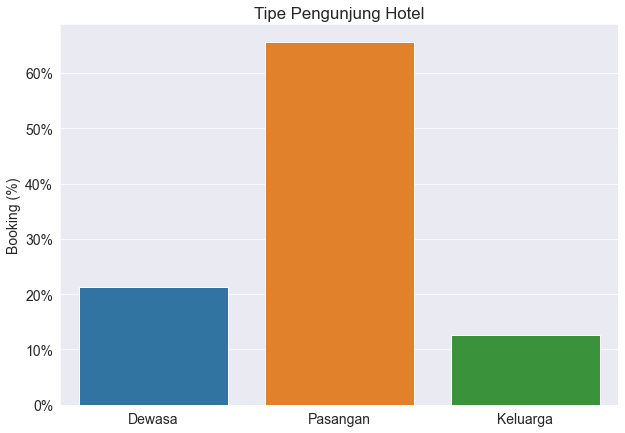

In [40]:
single   = df_no_cancel[(df_no_cancel['adults']==1) & (df_no_cancel['children']==0) & (df_no_cancel['babies']==0)]
couple   = df_no_cancel[(df_no_cancel['adults']==2) & (df_no_cancel['children']==0) & (df_no_cancel['babies']==0)]
family   = df_no_cancel[df_no_cancel['adults'] + df_no_cancel['children'] + df_no_cancel['babies'] > 2]

## Make the list of Category names, and their total percentage
names = ['Dewasa', 'Pasangan', 'Keluarga']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_no_cancel.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Tipe Pengunjung Hotel', figsize=(10,7))

#### <font color='brown'> Dari Data Dapat disimpulkan bahwa, Paling Banyak Pasangan yang belum memiliki anak yang mendominasi penggunaan hotel untuk menginap, disusul oleh dewasa   </font>

In [ ]:
x,y = get_count(df['is_canceled'])